<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка данных</a></span></li><li><span><a href="#Построение-графиков" data-toc-modified-id="Построение-графиков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Построение графиков</a></span></li><li><span><a href="#Корреляция-между-признаками" data-toc-modified-id="Корреляция-между-признаками-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Корреляция между признаками</a></span></li><li><span><a href="#Выводы-по-первому-пункту" data-toc-modified-id="Выводы-по-первому-пункту-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выводы по первому пункту</a></span></li></ul></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Разделение-генеральной-совокупности-на-тренировочную,-валидационную-и-тестовую-выборки" data-toc-modified-id="Разделение-генеральной-совокупности-на-тренировочную,-валидационную-и-тестовую-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение генеральной совокупности на тренировочную, валидационную и тестовую выборки</a></span></li><li><span><a href="#Стандартизация-признаков" data-toc-modified-id="Стандартизация-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Стандартизация признаков</a></span></li><li><span><a href="#Подбор-гиперпараметров-и-построение-моделей" data-toc-modified-id="Подбор-гиперпараметров-и-построение-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гиперпараметров и построение моделей</a></span></li><li><span><a href="#Проверка-модели-на-валидационной-выборке" data-toc-modified-id="Проверка-модели-на-валидационной-выборке-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка модели на валидационной выборке</a></span></li><li><span><a href="#Выводы-по-второму-пункту" data-toc-modified-id="Выводы-по-второму-пункту-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы по второму пункту</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-третьему-пункту" data-toc-modified-id="Выводы-по-третьему-пункту-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы по третьему пункту</a></span></li></ul></li></ul></div>

# Выпускной проект

ПЛАН
1. исследовательский анализ данных: испортировать данные, привести их в нужный вид, проанализировать данные, построить графики при необходимости
2. построение модели: определить метрику, определить используемые модели, подобрать параметры, рассмотреть варианты улучшения модели и повышения ее качества
3. тестирование модели на тестовой выборке, внесение корректировок

## Исследовательский анализ данных

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

! pip install -U seaborn fast_ml
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Requirement already up-to-date: fast_ml in /home/jovyan/.local/lib/python3.7/site-packages (3.68)


### Импорт данных

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
data = [contract, personal, internet, phone]
for i in data:
    i.info()
#     print(pd.DataFrame(i).describe())
    print()
    print('Количество дубликатов', i.duplicated(keep = False).sum())
    print('----------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Количество дубликатов 0
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

Количество дубликатов 0
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeI

In [4]:
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [5]:
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [6]:
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [7]:
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


### Обработка данных

In [8]:
personal.loc[personal.gender == 'Male', 'gender'] = 1
personal.loc[personal.gender == 'Female', 'gender'] = 0

internet.loc[internet.InternetService == 'DSL', 'InternetService'] = 1
internet.loc[internet.InternetService == 'Fiber optic', 'InternetService'] = 0

contract.loc[contract.Type == 'One year', 'Type'] = 1
contract.loc[contract.Type == 'Two year', 'Type'] = 2
contract.loc[contract.Type == 'Month-to-month', 'Type'] = 0

contract.loc[contract.PaymentMethod == 'Electronic check', 'PaymentMethod'] = 0
contract.loc[contract.PaymentMethod == 'Mailed check', 'PaymentMethod'] = 1
contract.loc[contract.PaymentMethod == 'Bank transfer (automatic)', 'PaymentMethod'] = 2
contract.loc[contract.PaymentMethod == 'Credit card (automatic)', 'PaymentMethod'] = 3

In [9]:
contract.loc[contract.EndDate == 'No', 'EndDate'] = np.nan
contract.BeginDate = pd.to_datetime(contract['BeginDate'])
contract.EndDate = pd.to_datetime(contract.EndDate, format='%Y-%m-%d')

In [10]:
def change(data, column):
    for i in column:
        data.loc[data[i] == 'Yes', i] = 1
        data.loc[data[i] == 'No', i] = 0

In [11]:
change(contract, ['PaperlessBilling'])
change(personal, ['Partner', 'Dependents'])
change(internet, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])
change(phone, ['MultipleLines'])

In [12]:
def unique(data):
    for col in data:
        print(data[col].unique())

In [13]:
bases = [contract, personal, internet, phone]
for i in bases:
    unique(i)
    print('----------------------------------')

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['2020-01-01T00:00:00.000000000' '2017-04-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2017-07-01T00:00:00.000000000' '2014-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2015-04-01T00:00:00.000000000' '2015-09-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2015-10-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2014-02-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '201

In [14]:
data = contract.merge(personal, on = 'customerID', how = 'outer')
data = data.merge(internet, on = 'customerID', how = 'outer')
data = data.merge(phone, on = 'customerID', how = 'outer')

In [15]:
data = data.drop(np.where(data.TotalCharges == ' ')[0])

In [16]:
data.TotalCharges  =  data.TotalCharges.astype('float')

In [17]:
data = data.assign(Time = (data.EndDate - data.BeginDate).dt.days)

In [18]:
data.Time = data.Time.fillna(0)
# 0 - still using ; 1 - left
data.loc[data.Time > 0, 'Left'] = 1
data.Left = data.Left.fillna(0)

In [19]:
data.EndDate = data.EndDate.fillna('2020-02-01')
data = data.fillna(0)
data.EndDate = pd.to_datetime(data.EndDate, format='%Y-%m-%d')
data

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Time,Left
0,7590-VHVEG,2020-01-01,2020-02-01,0,1,0,29.85,29.85,0,0,...,1,0,1,0,0,0,0,0,0.0,0.0
1,5575-GNVDE,2017-04-01,2020-02-01,1,0,1,56.95,1889.50,1,0,...,1,1,0,1,0,0,0,0,0.0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,0,1,1,53.85,108.15,1,0,...,1,1,1,0,0,0,0,0,61.0,1.0
3,7795-CFOCW,2016-05-01,2020-02-01,1,0,2,42.30,1840.75,1,0,...,1,1,0,1,1,0,0,0,0.0,0.0
4,9237-HQITU,2019-09-01,2019-11-01,0,1,0,70.70,151.65,0,0,...,0,0,0,0,0,0,0,0,61.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,1,1,1,84.80,1990.50,1,0,...,1,1,0,1,1,1,1,1,0.0,0.0
7039,2234-XADUH,2014-02-01,2020-02-01,1,1,3,103.20,7362.90,0,0,...,0,0,1,1,0,1,1,1,0.0,0.0
7040,4801-JZAZL,2019-03-01,2020-02-01,0,1,0,29.60,346.45,0,0,...,1,1,0,0,0,0,0,0,0.0,0.0
7041,8361-LTMKD,2019-07-01,2019-11-01,0,1,1,74.40,306.60,1,1,...,0,0,0,0,0,0,0,1,123.0,1.0


In [20]:
data = data.assign(Lifetime = (data.EndDate - data.BeginDate).dt.days)

**data_d итоговая таблица**

In [21]:
data_d = data.drop(['BeginDate', 'EndDate', 'Time'], axis = 1)
data_d

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Left,Lifetime
0,7590-VHVEG,0,1,0,29.85,29.85,0,0,1,0,1,0,1,0,0,0,0,0,0.0,31
1,5575-GNVDE,1,0,1,56.95,1889.50,1,0,0,0,1,1,0,1,0,0,0,0,0.0,1036
2,3668-QPYBK,0,1,1,53.85,108.15,1,0,0,0,1,1,1,0,0,0,0,0,1.0,61
3,7795-CFOCW,1,0,2,42.30,1840.75,1,0,0,0,1,1,0,1,1,0,0,0,0.0,1371
4,9237-HQITU,0,1,0,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,0,1.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,1,84.80,1990.50,1,0,1,1,1,1,0,1,1,1,1,1,0.0,730
7039,2234-XADUH,1,1,3,103.20,7362.90,0,0,1,1,0,0,1,1,0,1,1,1,0.0,2191
7040,4801-JZAZL,0,1,0,29.60,346.45,0,0,1,1,1,1,0,0,0,0,0,0,0.0,337
7041,8361-LTMKD,0,1,1,74.40,306.60,1,1,1,0,0,0,0,0,0,0,0,1,1.0,123


In [22]:
data_d.info()
# data_d.MonthlyCharges = data_d.MonthlyCharges.astype('float32')
# data_d.TotalCharges  = data_d.TotalCharges.astype('float32')
# data_d.Left = data_d.Left.astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7032 non-null object
Type                7032 non-null int64
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null int64
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
MultipleLines       7032 non-null int64
Left                7032 non-null float64
Lifetime            7032 non-null int64
dtypes: float64(3), int64(16), object(1)
memory usage: 1.1+ MB


### Построение графиков

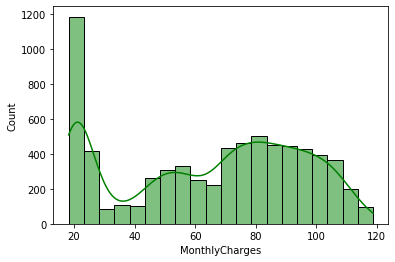

In [23]:
sns.histplot(data_d.MonthlyCharges , bins = 20, kde = True, color = 'green')

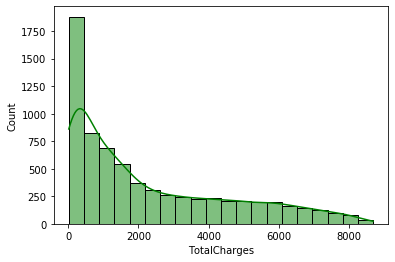

In [24]:
sns.histplot(data_d.TotalCharges , bins = 20, kde = True, color='green')

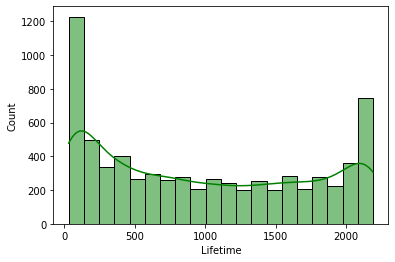

In [25]:
sns.histplot(data_d.Lifetime , bins = 20, kde = True, color='green')

Type


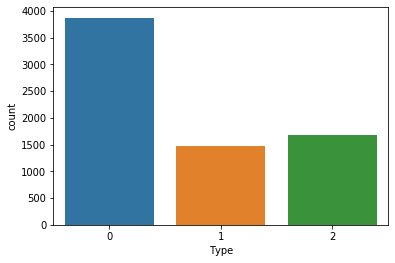

PaperlessBilling


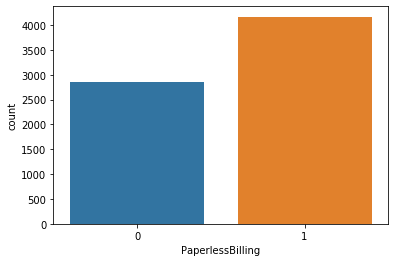

PaymentMethod


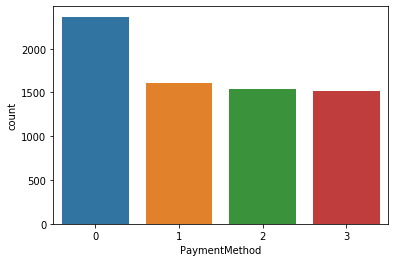

gender


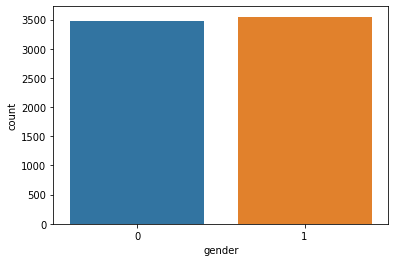

SeniorCitizen


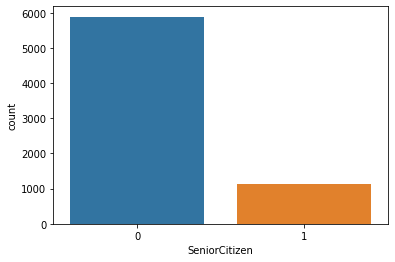

Partner


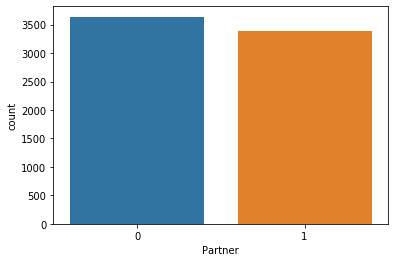

Dependents


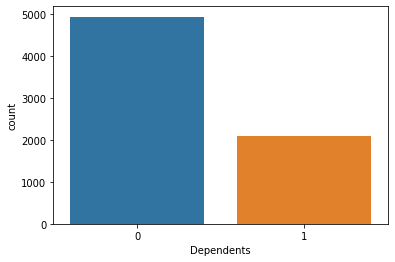

InternetService


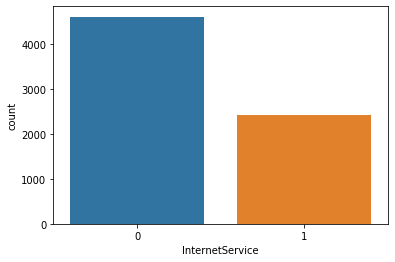

OnlineSecurity


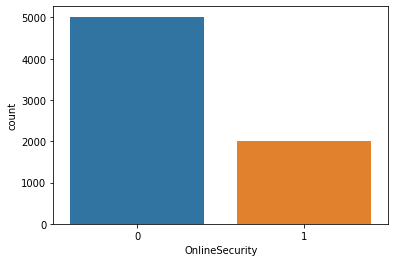

OnlineBackup


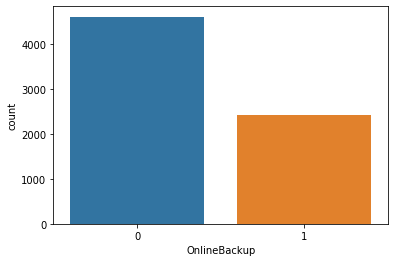

DeviceProtection


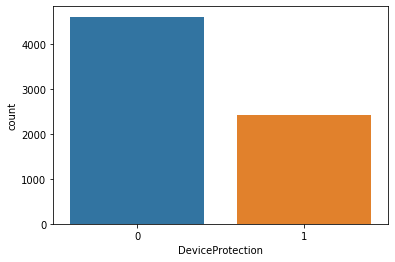

TechSupport


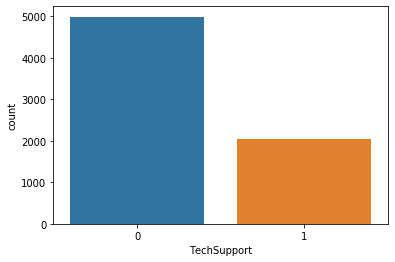

StreamingTV


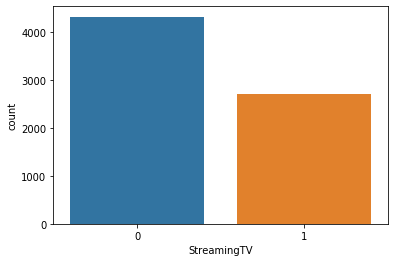

StreamingMovies


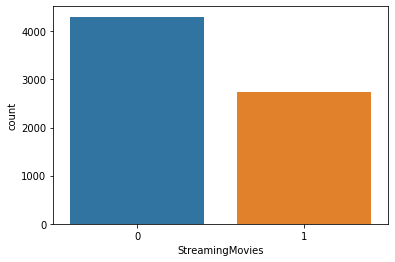

In [26]:
column = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen',
          'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
          'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in column:
    print(i)
#     plt.bar(height = data_d[i], x = data_d[i])
    sns.countplot(x = data_d[i])
    plt.show()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК. Напомню только, чтографический анализ - это предположение/гипотеза. И чтобы её подтвердить или опровергнуть также следует применять аналитические методы анализа из области "проверка гипотез".

### Корреляция между признаками

Text(0.5, 1, 'Triangle Correlation Heatmap')

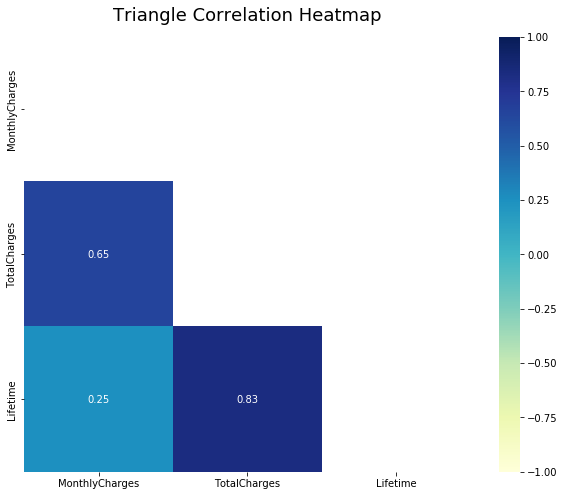

In [27]:
data_corr = data_d[['MonthlyCharges', 'TotalCharges', 'Lifetime']]
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(data_corr.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(data_corr.corr().round(2), annot = True, mask=mask, cmap="YlGnBu",vmin=-1, vmax=1)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Мультиколлинеарность - явление, при котором наблюдается сильная корреляция между признаками. мультиколлинеарность может стать причиной переобучаемости модели, что приведет к неверному результату. Кроме того, избыточные коэффициенты увеличивают сложность модели машинного обучения, а значит, время ее тренировки возрастает.
При построении было учтено то, что нужно использовать только количественные данные, поэтому были оставлены только финансовые показатели и длительность договора. 

### Выводы по первому пункту

1. были импортированы и соединены 4 таблицы в одну итоговую, data_d итоговая таблица для дальнейшего построения моделей
2. был выведен целевой  признак Left - ушел клиент из компании или нет
3. был добавилен признак Lifetime - длительность договора с клиентом
4. Больше всего клиентов платят ежемесячно в районе 20 ед., также большое количество людей платит 70-90 ед.
5. График TotalCharges имеет хвост, уходящий вправо
6. Lifetime имеет резкий скачок по количеству до 100 дней и после 2100 дней пользования, то есть существует большая часть клиентов, которые ушли в течение 3 месяцев после оформления договора и тех, кто уже пользуется сервисом более 5.8 лет
7. Большинство клиентов использует тип оплаты Month-to-month, больше всего людей использует метод оплаты Electronic check
8. Количество дней договора коррелирует напрямую с TotalCharges

## Построение моделей

In [28]:
data_d = data_d.drop(['customerID'], axis = 1)

### Разделение генеральной совокупности на тренировочную, валидационную и тестовую выборки

In [29]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data_d, 
                                                                            target = 'Left', 
                                                                            train_size=0.6, 
                                                                            valid_size=0.2, 
                                                                            test_size=0.2)

### Стандартизация признаков

In [30]:
numeric = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[numeric] = scaler.fit_transform(X_train[numeric]) 
X_valid[numeric] = scaler.transform(X_valid[numeric]) 
X_test[numeric] = scaler.transform(X_test[numeric])

import warnings
warnings.filterwarnings('ignore')

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(4219, 18) (4219,)
(1406, 18) (1406,)
(1407, 18) (1407,)


### Подбор гиперпараметров и построение моделей

In [31]:
scores = []
def search(model, parametrs, model_name):
    search = RandomizedSearchCV(model, parametrs, cv=5)
    search.fit(X_train, y_train)
    predicted_valid = search.predict(X_valid)
    print(model_name, search.best_params_)
    scores.append(pd.Series({
        'Estimator' : model_name, 
        'best_parameter': search.best_params_, 
        'best_score': search.best_score_
    }))
    return search.best_params_
    warnings.filterwarnings('ignore')

decision_param = search(DecisionTreeClassifier(random_state = 12345, class_weight='balanced'),
                        {'max_depth': range (1, 13, 1),
                         'criterion': ['gini', 'entropy']} , 
                        'DecisionTreeClassifier')

param_random = search(RandomForestClassifier(random_state = 12345, class_weight='balanced'),
                      { 'n_estimators': range (1, 51, 5),
                       'max_depth': range (1,13, 2),
                       'min_samples_leaf': range (1,8),
                       'min_samples_split': range (2,10,2),
                       'criterion': ['gini', 'entropy'] ,
                       'max_features': ['auto', 'sqrt', 'log2']} , 
                      'RandomForestClassifier')

param_XGBClassifier = search(XGBClassifier(random_state = 12345, class_weight='balanced'), 
                             { 'eval_metric' : ['mlogloss'],
                              'max_depth': range (1,13, 1),
                              'n_estimators': range(1, 400, 20)}, 
                             'XGBClassifier')

param_kn = search(KNeighborsClassifier(), 
                  {'n_neighbors': range (1,20, 1), 
                   'weights': ['distance', 'uniform']}, 
                  'KNeighborsClassifier')

param_ada = search(AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = 12345)),
       {'base_estimator__criterion' : ["gini", "entropy"],
        "base_estimator__splitter" :   ["best", "random"]}, 
       'AdaBoostClassifier' )
param_cat = search(CatBoostClassifier(), 
                   {'depth': [None, 1, 10],
                     'iterations':[250,100, 150]},
                   'CatBoostClassifier')

param_log = search(LogisticRegression(random_state = 12345), 
                  {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}, 
                 'LogisticRegression')



DecisionTreeClassifier {'max_depth': 11, 'criterion': 'entropy'}
RandomForestClassifier {'n_estimators': 16, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'gini'}
XGBClassifier {'n_estimators': 261, 'max_depth': 4, 'eval_metric': 'mlogloss'}
KNeighborsClassifier {'weights': 'uniform', 'n_neighbors': 8}
AdaBoostClassifier {'base_estimator__splitter': 'best', 'base_estimator__criterion': 'gini'}
Learning rate set to 0.081288
0:	learn: 0.6401322	total: 54.8ms	remaining: 13.6s
1:	learn: 0.6009114	total: 60.4ms	remaining: 7.49s
2:	learn: 0.5658720	total: 64.4ms	remaining: 5.3s
3:	learn: 0.5395458	total: 85.9ms	remaining: 5.28s
4:	learn: 0.5175404	total: 91.1ms	remaining: 4.46s
5:	learn: 0.4976050	total: 97ms	remaining: 3.94s
6:	learn: 0.4800579	total: 184ms	remaining: 6.38s
7:	learn: 0.4686560	total: 189ms	remaining: 5.7s
8:	learn: 0.4547027	total: 194ms	remaining: 5.18s
9:	learn: 0.4461058	total: 199ms	remaining: 4.76s
10:	learn: 0.4386

In [32]:
results = pd.concat(scores, axis=1).T.set_index('Estimator')
results

,best_parameter,best_score
Estimator,,
DecisionTreeClassifier,"{'max_depth': 11, 'criterion': 'entropy'}",0.739275
RandomForestClassifier,"{'n_estimators': 16, 'min_samples_split': 2, '...",0.782176
XGBClassifier,"{'n_estimators': 261, 'max_depth': 4, 'eval_me...",0.844513
KNeighborsClassifier,"{'weights': 'uniform', 'n_neighbors': 8}",0.836217
AdaBoostClassifier,"{'base_estimator__splitter': 'best', 'base_est...",0.784072
CatBoostClassifier,"{'iterations': 250, 'depth': None}",0
LogisticRegression,{'solver': 'newton-cg'},0.798056


### Проверка модели на валидационной выборке

In [35]:
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=X_valid.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

Learning rate set to 0.086595
0:	learn: 0.6468195	total: 5.54ms	remaining: 1.38s
1:	learn: 0.6143960	total: 9.39ms	remaining: 1.16s
2:	learn: 0.5694010	total: 51ms	remaining: 4.2s
3:	learn: 0.5337891	total: 66.8ms	remaining: 4.11s
4:	learn: 0.5047328	total: 158ms	remaining: 7.75s
5:	learn: 0.4806032	total: 174ms	remaining: 7.08s
6:	learn: 0.4606432	total: 194ms	remaining: 6.75s
7:	learn: 0.4449158	total: 286ms	remaining: 8.64s
8:	learn: 0.4306840	total: 375ms	remaining: 10s
9:	learn: 0.4185117	total: 391ms	remaining: 9.39s
10:	learn: 0.4070589	total: 479ms	remaining: 10.4s
11:	learn: 0.3992346	total: 494ms	remaining: 9.79s
12:	learn: 0.3918315	total: 585ms	remaining: 10.7s
13:	learn: 0.3838780	total: 684ms	remaining: 11.5s
14:	learn: 0.3749300	total: 699ms	remaining: 11s
15:	learn: 0.3679872	total: 783ms	remaining: 11.5s
16:	learn: 0.3612601	total: 875ms	remaining: 12s
17:	learn: 0.3545679	total: 891ms	remaining: 11.5s
18:	learn: 0.3521438	total: 969ms	remaining: 11.8s
19:	learn: 0.347

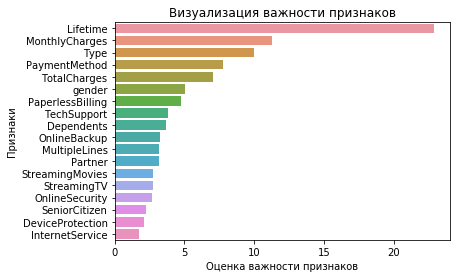

In [36]:
chart_feature_imp(CatBoostClassifier(**param_cat, random_state = 12345).fit(X_train, y_train))

In [37]:
def roc(model, X, y):
    model.fit(X_train, y_train)
    
    predicted_valid = model.predict(X)
    print('acc:', accuracy_score(predicted_valid, y))
    probabilities_valid = model.predict_proba(X)
    probabilities_one_valid = probabilities_valid[:, 1]

    print('auc_roc: ', roc_auc_score(y, probabilities_one_valid).round(4))
    fpr, tpr, thresholds = roc_curve(y,probabilities_one_valid)

    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.plot(fpr, tpr)
    plt.xlim([0,1]) 
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()
    
#    importance = model.feature_importances_
#     plt.bar([x for x in range(len(importance))], importance)
#     plt.show()
#     importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
#     ax = sns.barplot(x=importance, y=importance.index)
#     _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
#     _ = ax.set_title('Визуализация важности признаков')
    
#     plt.xticks(rotation=90)
#     plt.bar(X_train.columns, importance)
    

acc: 0.8413940256045519
auc_roc:  0.889


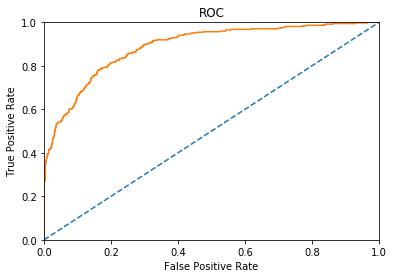

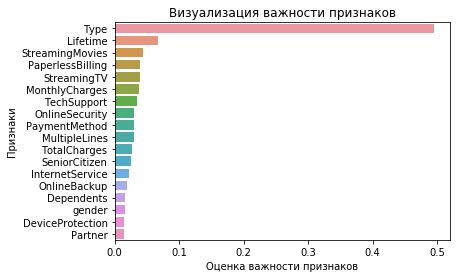

In [38]:
roc(XGBClassifier(**param_XGBClassifier, random_state = 12345, class_weight='balanced'), 
   X_valid, y_valid)
chart_feature_imp(XGBClassifier(**param_XGBClassifier, random_state = 12345, class_weight='balanced').fit(X_train, y_train))

Learning rate set to 0.086595
0:	learn: 0.6240459	total: 17.3ms	remaining: 4.3s
1:	learn: 0.5785974	total: 95.1ms	remaining: 11.8s
2:	learn: 0.5464351	total: 110ms	remaining: 9.08s
3:	learn: 0.5146892	total: 198ms	remaining: 12.2s
4:	learn: 0.4891659	total: 291ms	remaining: 14.2s
5:	learn: 0.4674474	total: 307ms	remaining: 12.5s
6:	learn: 0.4479907	total: 398ms	remaining: 13.8s
7:	learn: 0.4328098	total: 487ms	remaining: 14.7s
8:	learn: 0.4212631	total: 500ms	remaining: 13.4s
9:	learn: 0.4097076	total: 592ms	remaining: 14.2s
10:	learn: 0.3999929	total: 609ms	remaining: 13.2s
11:	learn: 0.3918345	total: 695ms	remaining: 13.8s
12:	learn: 0.3860990	total: 705ms	remaining: 12.9s
13:	learn: 0.3776088	total: 785ms	remaining: 13.2s
14:	learn: 0.3715923	total: 802ms	remaining: 12.6s
15:	learn: 0.3662618	total: 889ms	remaining: 13s
16:	learn: 0.3613719	total: 978ms	remaining: 13.4s
17:	learn: 0.3570938	total: 994ms	remaining: 12.8s
18:	learn: 0.3537594	total: 1.08s	remaining: 13.2s
19:	learn: 0

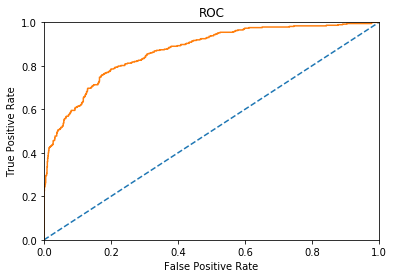

Learning rate set to 0.086595
0:	learn: 0.6468195	total: 2.85ms	remaining: 709ms
1:	learn: 0.6143960	total: 5.46ms	remaining: 678ms
2:	learn: 0.5694010	total: 16.9ms	remaining: 1.39s
3:	learn: 0.5337891	total: 44.1ms	remaining: 2.71s
4:	learn: 0.5047328	total: 57.5ms	remaining: 2.82s
5:	learn: 0.4806032	total: 146ms	remaining: 5.95s
6:	learn: 0.4606432	total: 160ms	remaining: 5.57s
7:	learn: 0.4449158	total: 252ms	remaining: 7.62s
8:	learn: 0.4306840	total: 342ms	remaining: 9.16s
9:	learn: 0.4185117	total: 355ms	remaining: 8.52s
10:	learn: 0.4070589	total: 444ms	remaining: 9.64s
11:	learn: 0.3992346	total: 534ms	remaining: 10.6s
12:	learn: 0.3918315	total: 547ms	remaining: 9.98s
13:	learn: 0.3838780	total: 638ms	remaining: 10.8s
14:	learn: 0.3749300	total: 652ms	remaining: 10.2s
15:	learn: 0.3679872	total: 744ms	remaining: 10.9s
16:	learn: 0.3612601	total: 829ms	remaining: 11.4s
17:	learn: 0.3545679	total: 845ms	remaining: 10.9s
18:	learn: 0.3521438	total: 929ms	remaining: 11.3s
19:	le

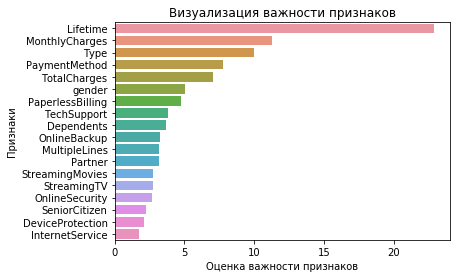

In [39]:
roc(CatBoostClassifier(**param_cat), 
   X_valid, y_valid)
chart_feature_imp(CatBoostClassifier(**param_cat, random_state = 12345).fit(X_train, y_train))

### Выводы по второму пункту

1. Были подобраны гиперпараметры для следующих моделей: DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, KNeighborsClassifier, AdaBoostClassifier, CatBoostClassifier, LogisticRegression	
2. Наилучшие показатель качества при подборе гиперпараметров дала модель XGBClassifier
3. При тестировании модели на валидационной выборке XGBClassifier показало значение acc: 0.84 и auc_roc:  0.89 (причем наиболее важным был признак type), CatBoostClassifier показало значение acc: 0.84 и auc_roc:  0.8697 (причем наиболее важным был признак lifetime)


## Проверка модели на тестовой выборке

acc: 0.8542999289267946
auc_roc:  0.9069


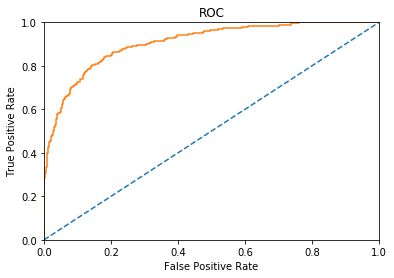

In [40]:
roc(XGBClassifier(**param_XGBClassifier, random_state = 12345, class_weight='balanced'), 
   X_test, y_test)

Learning rate set to 0.086595
0:	learn: 0.6240459	total: 17.7ms	remaining: 4.41s
1:	learn: 0.5785974	total: 58.3ms	remaining: 7.23s
2:	learn: 0.5464351	total: 75.9ms	remaining: 6.25s
3:	learn: 0.5146892	total: 90.1ms	remaining: 5.54s
4:	learn: 0.4891659	total: 184ms	remaining: 9.01s
5:	learn: 0.4674474	total: 196ms	remaining: 7.98s
6:	learn: 0.4479907	total: 286ms	remaining: 9.93s
7:	learn: 0.4328098	total: 377ms	remaining: 11.4s
8:	learn: 0.4212631	total: 387ms	remaining: 10.4s
9:	learn: 0.4097076	total: 474ms	remaining: 11.4s
10:	learn: 0.3999929	total: 489ms	remaining: 10.6s
11:	learn: 0.3918345	total: 577ms	remaining: 11.4s
12:	learn: 0.3860990	total: 584ms	remaining: 10.6s
13:	learn: 0.3776088	total: 670ms	remaining: 11.3s
14:	learn: 0.3715923	total: 691ms	remaining: 10.8s
15:	learn: 0.3662618	total: 774ms	remaining: 11.3s
16:	learn: 0.3613719	total: 789ms	remaining: 10.8s
17:	learn: 0.3570938	total: 875ms	remaining: 11.3s
18:	learn: 0.3537594	total: 885ms	remaining: 10.8s
19:	lea

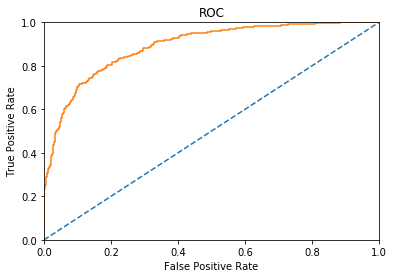

In [41]:
roc(CatBoostClassifier(**param_cat), 
   X_test, y_test)

### Выводы по третьему пункту

1. На тестовой выборке использовались модели XGBClassifier и CatBoostClassifier
3. При тестировании модели XGBClassifier показало значение acc: 0.85 и auc_roc:   0.9 , CatBoostClassifier показало значение acc: 0.85 и auc_roc:  0.89 

Вопросы: 
1. почему при подборе гиперпараметров CatBoostClassifier показал 0 в best_scorе?
2. Стоит ли в данном случае как то работать с порогом в AUC-ROC?
3. Стоит ли как то еще обрабатывать исходные признаки для улучшения модели?
4. Стоит ли использовать PCA в данном случае? 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, Екатерина, скажу честно, уверенная работа, на мой взгляд)<br>
Обработка данных, размышления над факторами, многогранная модельная работа, конечные результаты - многое удалось как надо<br> 
Работа с кластерами - отличных ход!<br>

Прежде, чем идти дальше, напомню из прошлых наших общений основные моменты, которые бы мне хотелось зафиксировать, как важные для момделирования (многое из этого - ты отлично используешь):<br>   
1) F1, Акураси и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
    
2) При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
Это я к тому разделу, который посвящён анализу данных. Там ты сделал интересные предположения и чтобы их доказать, стои проверить аналитически. Вот как раз те методы проверки гипотез, что выше написал.<br>
    
3) Алгоритм нахождения модели может быть таким:<br>
- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.<br>
- генерируем разные факторы влияния - любые.<br>
- дизайнируем (прикидываем) какие методы решения есть, чтобы решить проблему.<br>
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.<br>
- строим модели и анализируем те фактры, какие сгенерировали ранее.<br>
- Думаем над тем, какие причины (факторы) могут ещё влиять на отток.<br>
- если после нескольких итераций точность "замирает" - значит достигли потолка)<br>
 
4) Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высока я метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют на уход клиента.

    
По твоим вопросам:<br>
1) Пока сам не понял( Обязательно посмотрю. А пока отшлю тебе на корректиировку.<br>
2) Я бы не стал) ЛУчше бы потратил время на расчёт полноты и точности. И поработал бы с этими метриками<br>
3) и 4) Мы ограничены только своим временем и фантазией))<br>
Можно ещё оппробовать разного-разного. И от этого может и будет улучшение. В реальности, надо исходить из соотношения затрат времени/ возможная выгода. Если эффект от моделирования ожидается млн-ы рублей, то и времени можно потратить))<br>
В этом проекте - уже достаточно, на мой взгляд.<br>
    
<font color='red'>
Есть пару-тройку вопросов для дополнений:<br>
1)При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы имеют сильную корреляцию друг с другом - больше 0.8).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее) Тем более, что сам корреляционный анализ ты проводишь. Там, кстати, оставил комментарий по использованию её.<br><br>
2) Будет здорово, если построишь график важности факторов.<br>
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Просто эти два пункта - важный момент в алгоритме моделирования. И хотелось, чтобы они у тебя остались в финале.<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

ОТЧЕТ 

1. Все пункты проекта и плана были выполнены
2.  - были импортированы и соединены 4 таблицы в одну итоговую, data_d итоговая таблица для дальнейшего построения моделей
 - был выведен целевой  признак Left - ушел клиент из компании или нет
 - был добавлен признак Lifetime - длительность договора с клиентом
 - Были подобраны гиперпараметры для следующих моделей: DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, KNeighborsClassifier, AdaBoostClassifier, CatBoostClassifier, LogisticRegression	
 - лучшие показатели дали модели CatBoostClassifier и XGBClassifier
3. При тестировании модели CatBoostClassifier показало значение acc: 0.85 и auc_roc:  0.89 